## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install pandas_datareader

You should consider upgrading via the 'C:\Users\Pasha\PycharmProjects\SII\venv\Scripts\python.exe -m pip install --upgrade pip' command.


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [3]:
import numpy as np

# Чтение файла в виде memmap
data = np.lib.format.open_memmap('data/average_ratings.npy', mode='r')

# Извлечение заголовков
descr = data.dtype.descr
shape = data.shape
fortran_order = data.flags.f_contiguous

# Вывод заголовков
print(descr)
print(shape)
print(fortran_order)

[('', '<f8')]
(3, 1095)
False


In [4]:
import pandas as pd

# Чтение файла .npy с помощью Pandas
df = pd.DataFrame(np.load('data/flipped_average_ratings.npy'))

# Вывод содержимого
print(df.head())

          0         1         2
0  5.000000  7.000000  3.000000
1  5.013103  6.970750  2.996861
2  5.026240  7.000000  2.993725
3  5.013103  6.970750  2.996861
4  5.000000  6.941621  3.000000


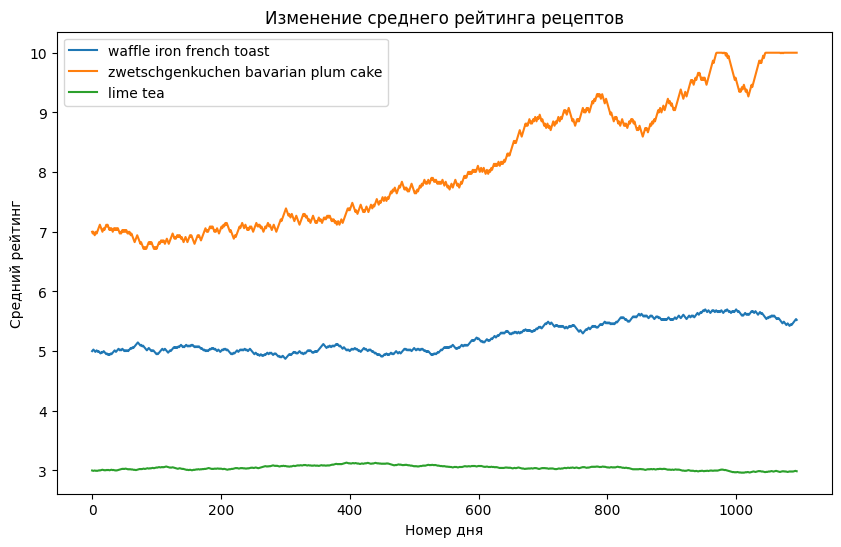

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла average_ratings.npy
data = np.load('data/average_ratings.npy')

# Переворачивание массива
flipped_data = np.transpose(data)

# Сохранение перевернутых данных в новом файле
np.save('data/flipped_average_ratings.npy', flipped_data)

# Загрузка данных из файла average_ratings.npy
data = np.load('data/flipped_average_ratings.npy')

# Названия рецептов
recipe_names = ['waffle iron french toast','zwetschgenkuchen bavarian plum cake','lime tea']
#recipe_names = [f'Recipe {i+1}' for i in range(len(time_series))]

# Создание временных рядов
time_series = data.T  # Транспонирование массива для соответствия осям

# Настройка параметров графика
plt.figure(figsize=(10, 6))
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга рецептов')

for i, series in enumerate(time_series):
    plt.plot(series, label=recipe_names[i])

plt.legend()
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


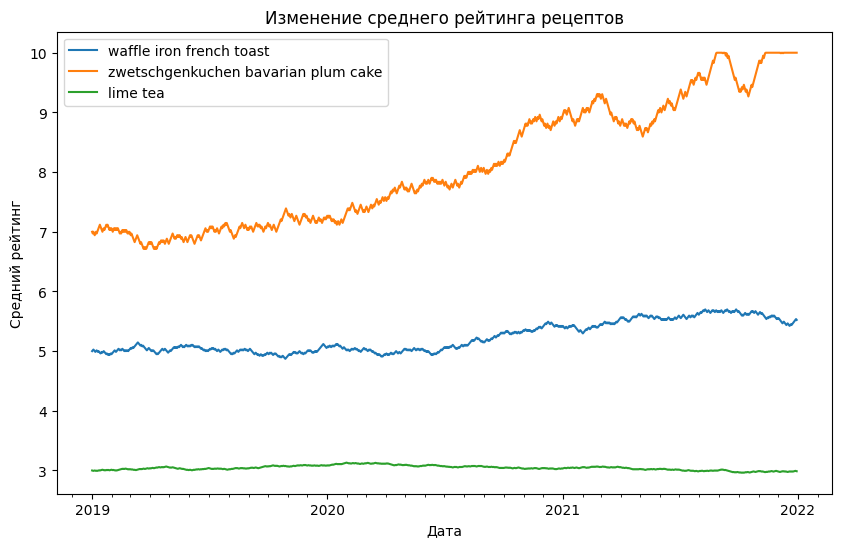

In [6]:
import matplotlib.dates as mdates
import datetime

# Загрузка данных из файла average_ratings.npy
data = np.load('data/flipped_average_ratings.npy')

# Создание временных рядов
time_series = data.T  # Транспонирование массива для соответствия осям

# Создание диапазона дат
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2021, 12, 30)
dates = np.arange(start_date, end_date + datetime.timedelta(days=1), datetime.timedelta(days=1))

# Настройка параметров графика
plt.figure(figsize=(10, 6))
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга рецептов')

# Построение временных рядов
for i, series in enumerate(time_series):
    plt.plot(dates, series, label=recipe_names[i])

plt.legend()

# Настройка оси X
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

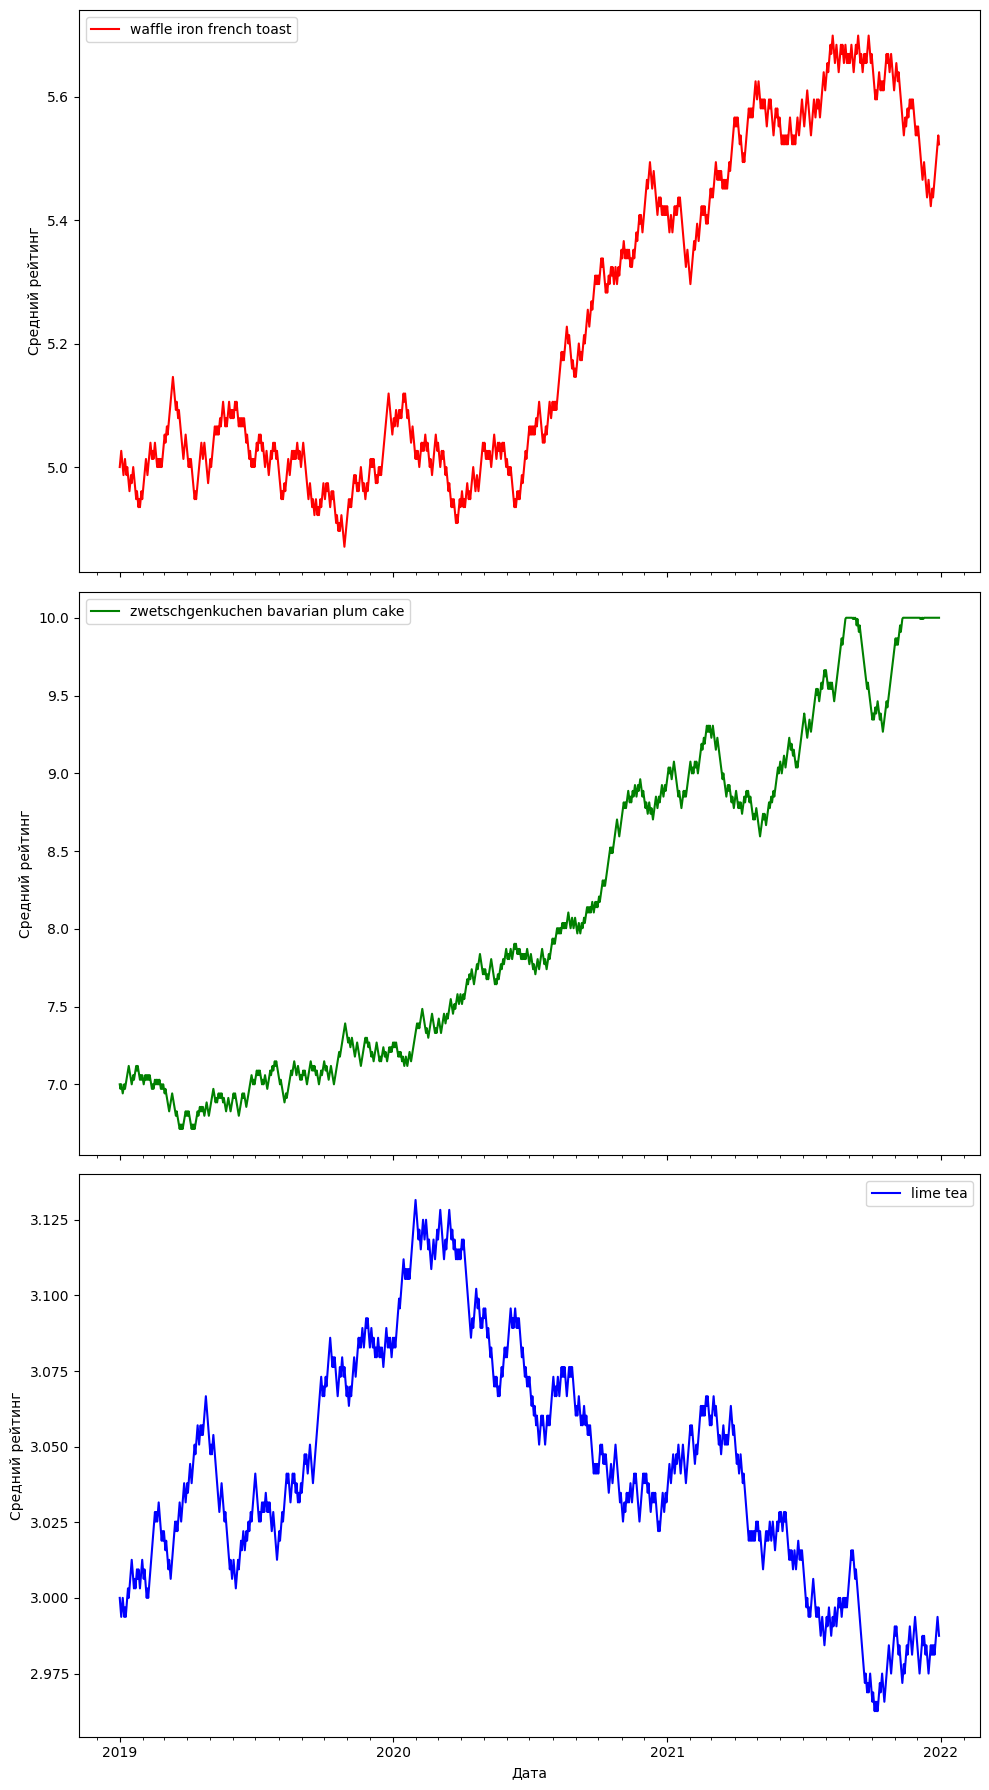

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Загрузка данных из файла average_ratings.npy
data = np.load('data/average_ratings.npy')

# Переворачивание массива
flipped_data = np.transpose(data)

# Сохранение перевернутых данных в новом файле
np.save('data/flipped_average_ratings.npy', flipped_data)

# Загрузка данных из файла average_ratings.npy
data = np.load('data/flipped_average_ratings.npy')

# Названия рецептов
recipe_names = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']

# Создание временных рядов
time_series = data.T  # Транспонирование массива для соответствия осям

# Создание диапазона дат
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2021, 12, 30)
dates = np.arange(start_date, end_date + datetime.timedelta(days=1), datetime.timedelta(days=1))

# Цвета линий
line_colors = ['red', 'green', 'blue']

# Настройка параметров графиков
fig, axs = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

# Построение временных рядов с указанием цветов
for i, series in enumerate(time_series):
    axs[i].plot(dates, series, label=recipe_names[i], color=line_colors[i])
    axs[i].set_ylabel('Средний рейтинг')
    axs[i].legend()

# Настройка оси X
axs[-1].xaxis.set_major_locator(mdates.YearLocator())
axs[-1].xaxis.set_minor_locator(mdates.MonthLocator())
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Настройка подписи горизонтальной оси
plt.xlabel('Дата')

plt.tight_layout()  # Для автоматического выравнивания подграфиков
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


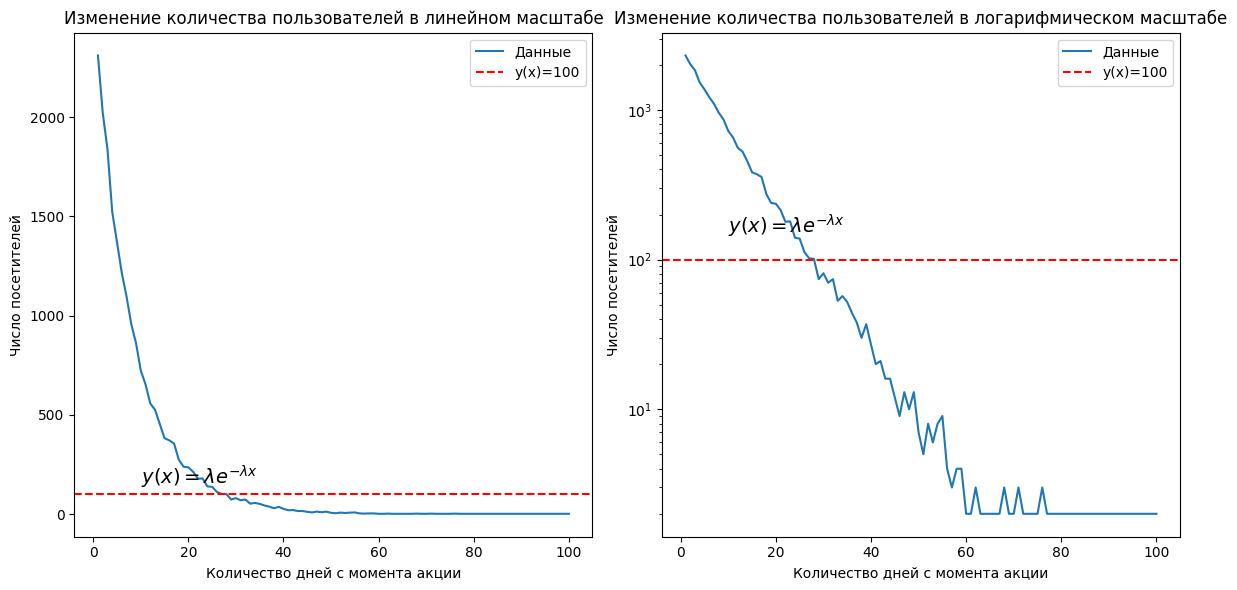

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла visitors.npy
data = np.load('data/visitors.npy')

# Диапазон дней
days = np.arange(1, len(data) + 1)

# Создание графиков в горизонтальном расположении
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Линейный масштаб
axs[0].plot(days, data, label='Данные')

# Горизонтальная линия y=100
axs[0].axhline(y=100, color='red', linestyle='--', label='y(x)=100')

axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')
axs[0].set_title('Изменение количества пользователей в линейном масштабе')
axs[0].legend()
axs[0].text(10, 150, r'$y(x) = \lambda e^{-\lambda x}$', fontsize=14)

# Логарифмический масштаб
axs[1].plot(days, data, label='Данные')

# Горизонтальная линия y=100
axs[1].axhline(y=100, color='red', linestyle='--', label='y(x)=100')

axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')
axs[1].set_title('Изменение количества пользователей в логарифмическом масштабе')
axs[1].legend()
axs[1].text(10, 150, r'$y(x) = \lambda e^{-\lambda x}$', fontsize=14)

axs[1].set_yscale('log')

plt.tight_layout()  # Для автоматического выравнивания подграфиков

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [9]:
reviews = ...
recipes = ...

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

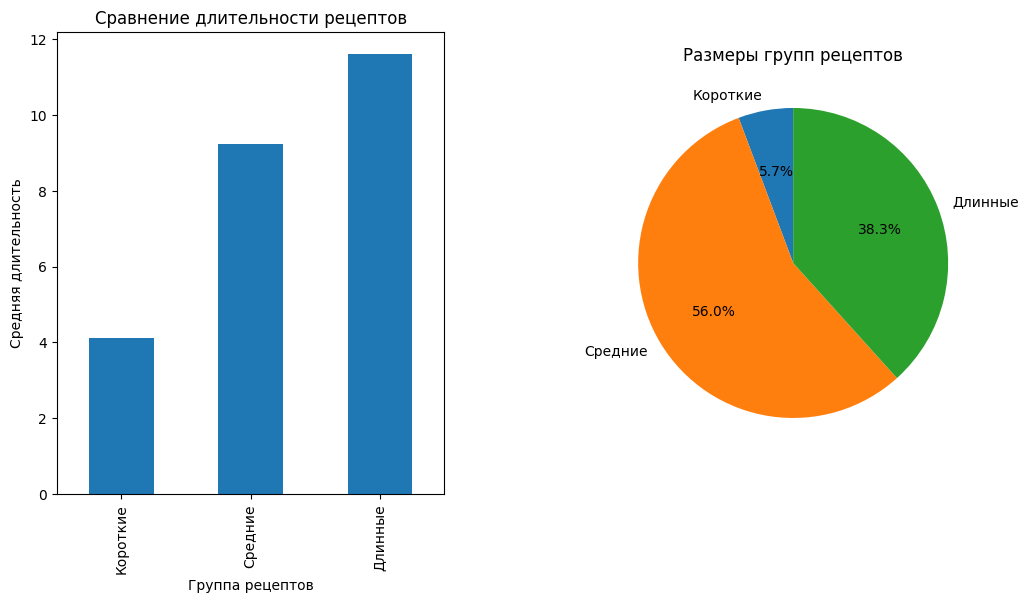

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файлов
recipes = pd.read_csv('data/recipes_sample.csv')
reviews = pd.read_csv('data/reviews_sample.csv')

# Объединение данных по идентификатору рецепта
data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# Группировка рецептов по длительности
groups = data.groupby(pd.cut(data['minutes'], bins=[0, 5, 50, float('inf')],
                             labels=['Короткие', 'Средние', 'Длинные']))

# Расчет среднего количества шагов и размера группы
average_steps = groups['n_steps'].mean()
group_sizes = groups.size()

# Создание фигуры с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Отображение столбчатой диаграммы
average_steps.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')
ax1.set_title('Сравнение длительности рецептов')

# Отображение круговой диаграммы
group_sizes.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('')
ax2.set_title('Размеры групп рецептов')

# Расположение подграфиков
plt.subplots_adjust(wspace=0.4)

plt.show()


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

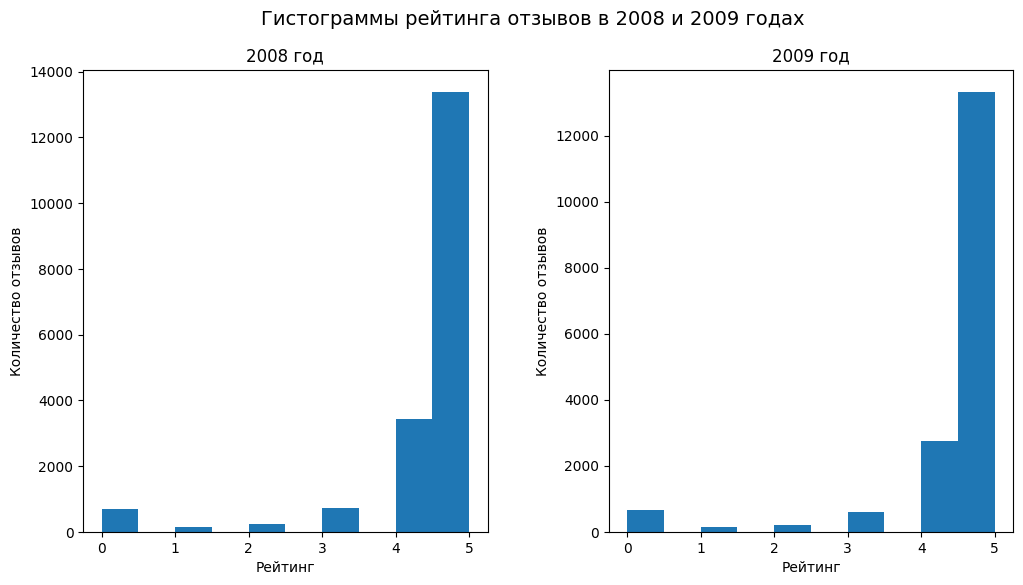

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файлов
reviews = pd.read_csv('data/reviews_sample.csv')

# Фильтрация отзывов по годам 2008 и 2009
filtered_reviews = reviews[reviews['date'].str.startswith(('2008', '2009'))]

# Создание фигуры с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы для 2008 года
ax1.hist(filtered_reviews[filtered_reviews['date'].str.startswith('2008')]['rating'], bins=10)
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Количество отзывов')
ax1.set_title('2008 год')

# Построение гистограммы для 2009 года
ax2.hist(filtered_reviews[filtered_reviews['date'].str.startswith('2009')]['rating'], bins=10)
ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Количество отзывов')
ax2.set_title('2009 год')

# Расположение подграфиков и настройка отступов
plt.subplots_adjust(wspace=0.3)

# Добавление общей подписи
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14)

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

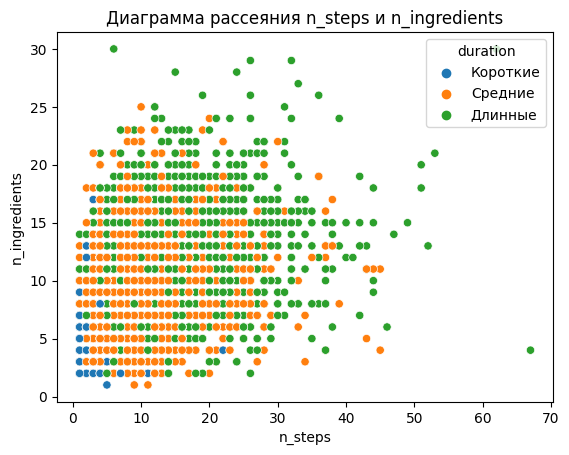

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла
recipes = pd.read_csv('data/recipes_sample.csv')

# Добавление столбца с категориальной длительностью рецепта
recipes['duration'] = pd.cut(recipes['minutes'], bins=[0, 5, 50, float('inf')],
                             labels=['Короткие', 'Средние', 'Длинные'])

# Построение диаграммы рассеяния
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='duration')

# Добавление заголовка
plt.title('Диаграмма рассеяния n_steps и n_ingredients')

# Отображение графика
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

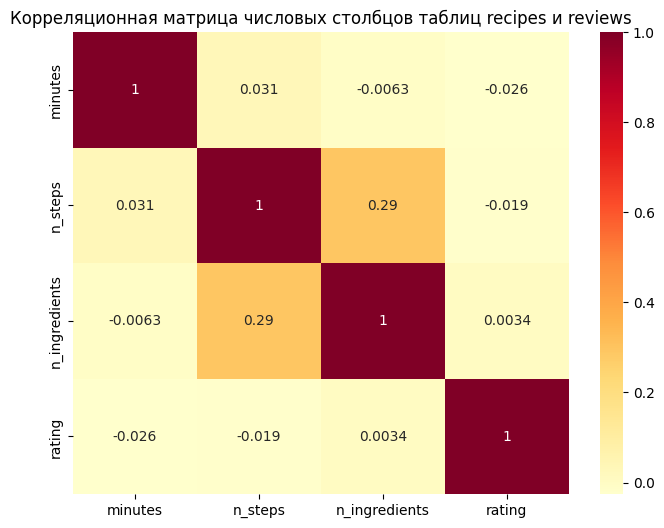

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файлов
recipes = pd.read_csv('data/recipes_sample.csv')
reviews = pd.read_csv('data/reviews_sample.csv')

# Объединение данных по идентификатору рецепта
data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# Выбор числовых столбцов
numerical_columns = ['minutes', 'n_steps', 'n_ingredients', 'rating']
data_numeric = data[numerical_columns]

# Создание корреляционной матрицы
corr_matrix = data_numeric.corr()

# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()